### read the combine dungeness new file 
### check whether moving average/median for each year is more appropriate than moving average of average of all years
### calculate the moving average and moving median for all species
### merge the two dataframes but do not include all columns twice
### calculate moving variance for each species

In [12]:
#imports
import numpy as np
import pandas as pd
from sys import platform
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:

if platform == "linux" or platform == "linux2":
    data_string = "/home/maria/Documents/data/pied_piper/"
    output_string = "/home/maria/Documents/output/pied_piper/"

elif platform == "win32"or platform == "win64":
    data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/"
    output_string = "C:/Users/maria/OneDrive/Documents/output/pied_piper/"

In [5]:
#reading combined new file
df = pd.read_csv(data_string +"combine_2005-2020_dungeness_new.csv", header=0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

Unnamed: 0                 Date         In  chinook0_hatchery_perhour  \
0              0           2005-03-08  19.733333                   0.000000   
1              1           2005-03-09  19.583333                   0.000000   
2              2           2005-03-10  23.300000                   0.000000   
3              3           2005-03-11  24.266667                   0.000000   
4              4           2005-03-12  22.866667                   0.000000   
5              5           2005-03-13  24.466667                   0.000000   
6              6           2005-03-14  24.416667                   0.000000   
7              7           2005-03-15  22.900000                   0.000000   
8              8           2005-03-16  24.366667                   0.000000   
9              9           2005-03-17  24.450000                   0.000000   
10            10           2005-03-18  24.450000                   0.000000   
11            11           2005-03-19  22.550000                   0.000000   
12            12           2005-03-20  24.383333                   0.000000   
13            13           2005-03-21  24.650000                   0.000000   
14            14           2005-03-22  24.050000                   0.000000   
15            15           2005-03-23  23.850000                   0.000000   
16            16           2005-03-24  25.050000                   0.000000   
17            17           2005-03-25  21.383333                   0.000000   
18            18           2005-03-26  21.016667                   0.000000   
19            19           2005-03-27  25.633333                   0.000000   
20            20           2005-03-28  23.550000                   0.000000   
21            21           2005-03-29  24.516667                   0.000000   
22            22           2005-03-30  24.700000                   0.000000   
23            23           2005-03-31  22.983333                   0.000000   
24            24           2005-04-01  24.050000                   0.000000   
25            25           2005-04-02  24.950000                   0.000000   
26            26           2005-04-03  23.750000                   0.000000   
27            27           2005-04-04  23.683333                   0.000000   
28            28           2005-04-05  24.500000                   0.000000   
29            29           2005-04-06  19.066667                   0.000000   
30            30           2005-04-08  12.083333                   0.000000   
31            31           2005-04-09  24.583333                   0.000000   
32            32           2005-04-10  24.416667                   0.000000   
33            33           2005-04-11  23.750000                   0.000000   
34            34           2005-04-12  23.283333                   0.000000   
35            35           2005-04-13  24.800000                   0.000000   
36            36           2005-04-14  23.500000                   0.000000   
37            37           2005-04-15  23.816667                   0.000000   
38            38           2005-04-16  24.616667                   0.000000   
39            39           2005-04-17  23.733333                   0.000000   
40            40           2005-04-18  24.083333                   0.000000   
41            41           2005-04-19  23.216667                   0.000000   
42            42           2005-04-20  24.416667                   0.000000   
43            43           2005-04-21  24.083333                   0.000000   
44            44           2005-04-22  24.333333                   0.000000   
45            45           2005-04-23  25.200000                   0.000000   
46            46           2005-04-24  22.500000                   0.000000   
47            47           2005-04-25  24.416667                   0.000000   
48            48           2005-04-26  23.500000                   0.000000   
49            49           2005-04-27  23.166667        

In [6]:
#calculating moving average for all species
#day of year
df['Date_datetime'] = pd.to_datetime(df['Date'])
df['doy'] = df['Date_datetime'].dt.dayofyear
df['year'] = df['Date_datetime'].dt.year
                                                

In [8]:
#read year_dungeness file
#calculate moving average (moving median does not make sense for counts with variable hours In)
#plot it 

year = 2005
df_year = pd.read_csv(data_string + str(year) + "_dungeness.csv", header=0)
#chinook0
df_year['ma_chinook0_wild_perhour'] = df_year['chinook0_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
df_year['ma_chinook0_hatchery_perhour'] = df_year['chinook0_hatchery_perhour'].rolling(7, min_periods=1, center=True).mean()
# df_year['ma_chinook0_perhour'] = df_year['chinook0_perhour'].rolling(7, min_periods=1, center=True).mean()

#chinook1
df_year['ma_chinook1_wild_perhour'] = df_year['chinook1_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
df_year['ma_chinook1_hatchery_perhour'] = df_year['chinook1_hatchery_perhour'].rolling(7, min_periods=1, center=True).mean()
# df_year['ma_chinook1_perhour'] = df_year['chinook1_perhour'].rolling(7, min_periods=1, center=True).mean()

#coho1
df_year['ma_coho1_wild_perhour'] = df_year['coho1_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
df_year['ma_coho1_hatchery_perhour'] = df_year['coho1_hatchery_perhour'].rolling(7, min_periods=1, center=True).mean()
# df_year['ma_coho1_perhour'] = df_year['coho1_perhour'].rolling(7, min_periods=1, center=True).mean()

#steelhead
df_year['ma_steelheadsmolt_wild_perhour'] = df_year['steelheadsmolt_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
df_year['ma_steelheadsmolt_hatchery_perhour'] = df_year['steelheadsmolt_hatchery_perhour'].rolling(7, min_periods=1, center=True).mean()
# df_year['ma_steelheadsmolt_parr_perhour'] = df_year['steelheadsmolt_perhour'].rolling(7, min_periods=1, center=True).mean()
# df_year['ma_steelheadsmolt_perhour'] = df_year['steelheadsmolt_parr_perhour'].rolling(7, min_periods=1, center=True).mean()


#chum0
df_year['ma_chum0_wild_perhour'] = df_year['chum0_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
df_year['ma_chum0_hatchery_perhour'] = df_year['chum0_hatchery_perhour'].rolling(7, min_periods=1, center=True).mean()


#pink0
df_year['ma_pink0_wild_perhour'] = df_year['pink0_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
df_year['ma_pink0_hatchery_perhour'] = df_year['pink0_hatchery_perhour'].rolling(7, min_periods=1, center=True).mean()

#environment
df_year['ma_temp'] = df_year['temp'].rolling(7, min_periods=1, center=True).mean()
df_year['ma_flow'] = df_year['flow'].rolling(7, min_periods=1, center=True).mean()


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_year)

Date         In  chinook0_hatchery_perhour  chinook0_wild_perhour  \
0    2005-03-08  19.733333                          0               4.358108   
1    2005-03-09  19.583333                          0               8.159234   
2    2005-03-10  23.300000                          0               1.800031   
3    2005-03-11  24.266667                          0              11.391838   
4    2005-03-12  22.866667                          0               7.015735   
5    2005-03-13  24.466667                          0               9.688081   
6    2005-03-14  24.416667                          0              12.075885   
7    2005-03-15  22.900000                          0               6.007115   
8    2005-03-16  24.366667                          0              16.085130   
9    2005-03-17  24.450000                          0              13.601069   
10   2005-03-18  24.450000                          0               9.331873   
11   2005-03-19  22.550000                          0               4.916967   
12   2005-03-20  24.383333                          0              14.434319   
13   2005-03-21  24.650000                          0               3.965122   
14   2005-03-22  24.050000                          0               1.146832   
15   2005-03-23  23.850000                          0               0.606302   
16   2005-03-24  25.050000                          0               1.394227   
17   2005-03-25  21.383333                          0               0.975138   
18   2005-03-26  21.016667                          0               5.074046   
19   2005-03-27  25.633333                          0               6.633736   
20   2005-03-28  23.550000                          0               2.823746   
21   2005-03-29  24.516667                          0               1.694226   
22   2005-03-30  24.700000                          0               0.781201   
23   2005-03-31  22.983333                          0               0.822891   
24   2005-04-01  24.050000                          0               0.815165   
25   2005-04-02  24.950000                          0               0.540708   
26   2005-04-03  23.750000                          0               0.314734   
27   2005-04-04  23.683333                          0               0.169113   
28   2005-04-05  24.500000                          0               0.163470   
29   2005-04-06  19.066667                          0               0.305964   
30   2005-04-08  12.083333                          0               0.000000   
31   2005-04-09  24.583333                          0               0.276923   
32   2005-04-10  24.416667                          0               0.081633   
33   2005-04-11  23.750000                          0               0.169492   
34   2005-04-12  23.283333                          0               0.343594   
35   2005-04-13  24.800000                          0               0.360621   
36   2005-04-14  23.500000                          0               0.078431   
37   2005-04-15  23.816667                          0               0.184615   
38   2005-04-16  24.616667                          0               0.304409   
39   2005-04-17  23.733333                          0               0.168580   
40   2005-04-18  24.083333                          0               0.167598   
41   2005-04-19  23.216667                          0               0.344610   
42   2005-04-20  24.416667                          0               0.245790   
43   2005-04-21  24.083333                          0               0.000000   
44   2005-04-22  24.333333                          0               0.171920   
45   2005-04-23  25.200000                          0               0.476993   
46   2005-04-24  22.500000                          0               0.867650   
47   2005-04-25  24.416667                          0               1.142217   
48   2005-04-26  23.500000                          0               0.788029   
49   2005-0

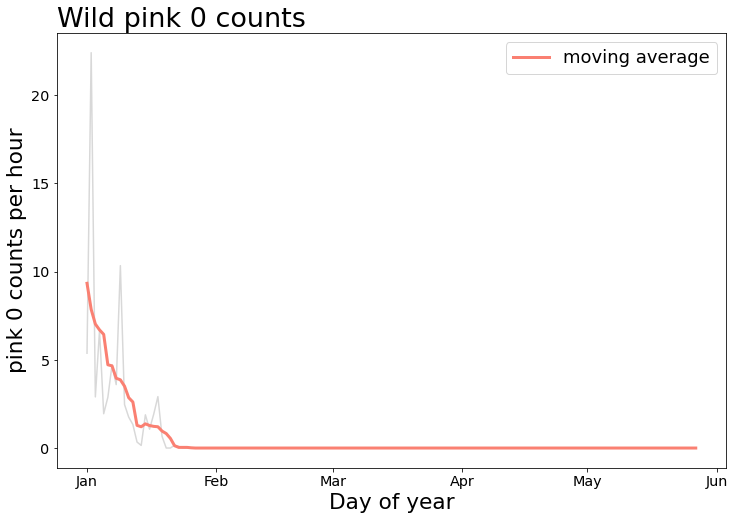

In [18]:
species = "pink"
year = "0"
fs = 18
lw = 3
transparency = 0.5
plt.close('all') # always start by cleaning up
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111)
string1 = species + year + "_wild_perhour"
string_ma = "ma_"+ species + year + "_wild_perhour"


ax1.plot(
    df_year['Date'], df_year[string1], color = 'gray',
    alpha = 0.3, linewidth = lw*0.5)
ax1.plot(
    df_year['Date'], df_year[string_ma], color = 'salmon', 
    label = 'moving average', alpha = 1, linewidth = lw)
xfmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(xfmt)
plt.xlabel('Day of year', size = 1.2*fs)
plt.ylabel(species + ' ' + year+ ' '  +'counts per hour', size = 1.2*fs)
ax1.tick_params(labelsize=.8*fs)
ax1.set_title('Wild ' + species + ' ' + year+ ' '  + 'counts', loc='left', fontsize = fs*1.5)
plt.legend(fontsize=fs, loc='upper right', title = '')

In [36]:
#caluclating moving average for all species for a single year 

#chinook0
df['ma_chinook0_wild_perhour'] = df['chinook0_wild_perhour'].rolling(7, min_periods=1, center=True).mean()

df['msd_chinook0_wild_perhour'] = df['chinook0_wild_perhour'].rolling(7, min_periods=1, center=True).std()

#chinook1
df['ma_chinook1_wild_perhour'] = df['chinook1_wild_perhour'].rolling(7, min_periods=1, center=True).mean()

df['msd_chinook1_wild_perhour'] = df['chinook1_wild_perhour'].rolling(7, min_periods=1, center=True).std()

#coho1
df['ma_coho1_wild_perhour'] = df['coho1_wild_perhour'].rolling(7, min_periods=1, center=True).mean()

df['msd_coho1_wild_perhour'] = df['coho1_wild_perhour'].rolling(7, min_periods=1, center=True).std()

#steelhead
df['ma_steelheadsmolt_wild_perhour'] = df['steelheadsmolt_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
df['msd_steelheadsmolt_wild_perhour'] = df['steelheadsmolt_wild_perhour'].rolling(7, min_periods=1, center=True).std()


#chum0
df['ma_chum0_wild_perhour'] = df['chum0_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
df['msd_chum0_wild_perhour'] = df['chum0_wild_perhour'].rolling(7, min_periods=1, center=True).std()

#pink0
df['ma_pink0_wild_perhour'] = df['pink0_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
df['msd_pink0_wild_perhour'] = df['pink0_wild_perhour'].rolling(7, min_periods=1, center=True).std()

#environment
df['ma_temp'] = df['temp'].rolling(7, min_periods=1, center=True).mean()
df['ma_flow'] = df['flow'].rolling(7, min_periods=1, center=True).mean()




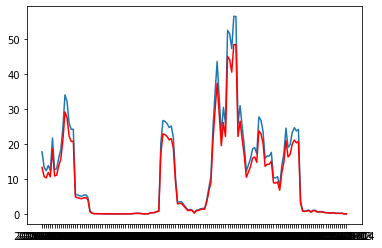

In [35]:
#check if pandas rolling var calculates the same thing as square of ma - ma of square
plt.plot(df_year['Date'],df_year['chinook0_wild_perhour'].rolling(7, min_periods=1, center=True).var())
plt.plot(df_year['Date'], (df_year['chinook0_wild_perhour']**2).rolling(7, min_periods=1, center=True).mean() - (df_year['chinook0_wild_perhour'].rolling(7, min_periods=1, center=True).mean())**2, color = 'red')

In [45]:
#groupby day of year
groupedby_doy = df.groupby(by=["doy"]).agg({'chinook0_wild_perhour':'mean',
                                            'chinook1_wild_perhour':'mean',
                                            'coho1_wild_perhour':'mean',
                                            'steelheadsmolt_wild_perhour':'mean',
                                            'chum0_wild_perhour':'mean',
                                            'pink0_wild_perhour':'mean',
                                            'temp':'mean',
                                            'flow':'mean'})

In [46]:


#chinook0
groupedby_doy['ma_chinook0_wild_perhour_mean'] = groupedby_doy['chinook0_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
groupedby_doy['msd_chinook0_wild_perhour_mean'] = groupedby_doy['chinook0_wild_perhour'].rolling(7, min_periods=1, center=True).std()

#chinook1
groupedby_doy['ma_chinook1_wild_perhour_mean'] = groupedby_doy['chinook1_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
groupedby_doy['msd_chinook1_wild_perhour_mean'] = groupedby_doy['chinook1_wild_perhour'].rolling(7, min_periods=1, center=True).std()

#coho1
groupedby_doy['ma_coho1_wild_perhour_mean'] = groupedby_doy['coho1_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
groupedby_doy['msd_coho1_wild_perhour_mean'] = groupedby_doy['coho1_wild_perhour'].rolling(7, min_periods=1, center=True).std()

#steelhead
groupedby_doy['ma_steelheadsmolt_wild_perhour_mean'] = groupedby_doy['steelheadsmolt_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
groupedby_doy['msd_steelheadsmolt_wild_perhour_mean'] = groupedby_doy['steelheadsmolt_wild_perhour'].rolling(7, min_periods=1, center=True).std()

#chum0
groupedby_doy['ma_chum0_wild_perhour_mean'] = groupedby_doy['chum0_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
groupedby_doy['msd_chum0_wild_perhour_mean'] = groupedby_doy['chum0_wild_perhour'].rolling(7, min_periods=1, center=True).std()

#pink0
groupedby_doy['ma_pink0_wild_perhour_mean'] = groupedby_doy['pink0_wild_perhour'].rolling(7, min_periods=1, center=True).mean()
groupedby_doy['msd_pink0_wild_perhour_mean'] = groupedby_doy['pink0_wild_perhour'].rolling(7, min_periods=1, center=True).std()

#environment
groupedby_doy['ma_temp_mean'] = groupedby_doy['temp'].rolling(7, min_periods=1, center=True).mean()
groupedby_doy['ma_flow_mean'] = groupedby_doy['flow'].rolling(7, min_periods=1, center=True).mean()

#maybe rename columns
groupedby_doy.rename(columns = {
    'chinook0_wild_perhour':'chinook0_wild_perhour_mean',
    'chinook1_wild_perhour':'chinook1_wild_perhour_mean',
    'coho1_wild_perhour':'coho1_wild_perhour_mean',
    'steelheadsmolt_wild_perhour':'steelheadsmolt_wild_perhour_mean',
    'chum0_wild_perhour':'chum0_wild_perhour_mean',
    'pink0_wild_perhour':'pink0_wild_perhour_mean',
    'temp':'temp_mean',
    'flow':'flow_mean',
}, inplace = True)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(groupedby_doy)

chinook0_wild_perhour_mean  chinook1_wild_perhour_mean  \
doy                                                           
16                     0.057143                    0.000000   
17                     0.000000                    0.000000   
18                     0.059701                    0.000000   
21                     0.039216                    0.000000   
22                     0.065574                    0.000000   
23                     0.038095                    0.000000   
26                     0.000000                    0.000000   
27                     0.137931                    0.000000   
30                     4.867906                    0.000000   
31                    10.720472                    0.000000   
32                     1.916896                    0.000000   
33                     1.240199                    0.000000   
34                     5.854951                    0.020833   
35                     1.331168                    0.000000   
36                     1.982668                    0.016579   
37                     4.040807                    0.013889   
38                     3.391342                    0.007463   
39                     2.691089                    0.013889   
40                     1.435238                    0.010084   
41                     1.917970                    0.014260   
42                     2.158652                    0.019406   
43                     7.161489                    0.039765   
44                     1.755502                    0.009653   
45                     1.397258                    0.010156   
46                     1.903170                    0.030790   
47                     2.493233                    0.015212   
48                     0.624384                    0.021853   
49                     2.356107                    0.017459   
50                     3.679653                    0.012545   
51                     2.537060                    0.000000   
52                     3.898100                    0.008684   
53                     5.881731                    0.007843   
54                     0.942409                    0.000000   
55                     1.181795                    0.018182   
56                     1.800513                    0.009488   
57                     2.209807                    0.013160   
58                     2.173291                    0.004444   
59                     1.659946                    0.002778   
60                     3.310287                    0.000000   
61                     4.326312                    0.014912   
62                     2.445172                    0.008985   
63                     1.948629                    0.013971   
64                     2.324719                    0.012371   
65                     1.388598                    0.008571   
66                     1.806026                    0.016233   
67                     2.292856                    0.000000   
68                     1.902207                    0.008623   
69                     1.397627                    0.004762   
70                     3.303775                    0.013993   
71                     4.057273                    0.004777   
72                     3.150269                    0.012576   
73                     2.877275                    0.000000   
74                     2.000200                    0.000000   
75                     8.218791                    0.013252   
76                     5.018424                    0.000000   
77                     4.086283                    0.009420   
78                     2.765024                    0.008646   
79                     3.936334                    0.009208   
80                     2.744559                    0.003906   
81                     2.957467                    0.020674   
82                     2.869807                    0.006019   
83                     2.553587     

In [47]:
combined_ma = pd.merge(df, groupedby_doy, left_on="doy", right_on="doy", how="left", validate="m:1")

In [48]:
#write the combined dataframe to csv
combined_ma.to_csv(data_string + "dungeness_2005-2020_combine_ma_msd.csv")  